### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### `Initial Setup`

In [1]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import library modeling


import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

**<> Context**<br>
**`Bank Marketing Campaign`**
<br>
    Produk keuangan yang digunakan oleh masyarakat semakin beragam, salah satunya adalah deposito berjangka yang banyak dikenal. Deposit berjangka adalah ketika seseorang menyimpan uang di bank atau lembaga keuangan dan hanya bisa ditarik setelah beberapa waktu. Sebagai imbalannya, nasabah akan mendapatkan bunga tetap sesuai dengan jumlah uang yang disimpan.

Namun, bank harus bersaing agar tidak kehilangan nasabah. Salah satu cara yang digunakan adalah dengan melakukan kampanye pemasaran melalui panggilan telepon untuk menawarkan deposito berjangka. Jika nasabah setuju, mereka akan menandai variabel target dengan `yes` sama dengan `1`, jika tidak setuju, maka akan ditandai dengan `no` sama dengan `0`.

Keterangan target:

0 : Tidak menaruh deposit

1 : Menaruh deposit

**<> Problem Statement**
<br>
Bank ingin meningkatkan efisiensi kampanye penawaran deposito dengan cara menargetkan calon nasabah yang berpotensi tertarik, karena jika menawarkan deposito kepada semua nasabah tanpa penyaringan, maka akan menghabiskan waktu dan biaya yang lebih banyak.

**<> Stakeholder**<br>
   - Bank's Marketing Manager :  pemimpin strategis yang merencanakan dan mengawasi keseluruhan upaya pemasaran
   - Bank's Marketing Team    :  kelompok individu yang bertanggung jawab atas implementasi taktis dari strategi tersebut

**<> Goals**<br>
Dengan memperhatikan permasalahan di atas, bank ingin bisa memprediksi calon nasabah yang kemungkinan mau menaruh deposito atau tidak. Hal ini akan membantu bank menargetkan kampanye pada calon nasabah yang berpotensi untuk menaruh deposito.

Selain itu, perusahaan juga ingin mengetahui faktor-faktor apa saja yang mempengaruhi keputusan calon nasabah dalam menaruh atau tidak menaruh deposito.

**Analytic Approach**

Menganalisis data untuk mencari pola yang membedakan calon nasabah yang akan atau tidak akan menaruh deposito.

Selanjutnya, akan dibuat model klasifikasi yang akan membantu bank dalam memprediksi kemungkinan seorang calon nasabah untuk menaruh deposito atau tidak.

**<> Metric Evaluation**<br>
**Type 1 error : False Positive**<br>
**Interpretasi**: Nasabah terdeteksi berkeinginan membuka rekening deposito, padahal sebenarnya tidak tertarik untuk melakukannya.<br>
**Konsekuensi:** Campaign yang dilakukan bank akan cenderung sia-sia karena tidak tepat sasaran.

**Type 2 error : False Negative**<br>
**Interpretasi**: Nasabah terdeteksi tidak berkeinginan membuka rekening deposito, padahal sebenarnya tertarik untuk melakukannya.<br>
**Konsekuensi:** Kehilangan calon nasabah yang berpotensial.

Berdasarkan konsekuensinya, tujuan utamanya adalah menciptakan model yang dapat mengurangi biaya kampanye bagi bank tanpa mengurangi jumlah calon nasabah potensial yang ingin dicari oleh bank. Kita ingin mendapatkan sebanyak mungkin prediksi yang benar untuk kelas positif, sambil meminimalkan prediksi yang salah positif. Oleh karena itu, metric utama yang akan kita gunakan adalah F1 Score.

### `Data Understanding`

Dataset dapat didownload pada ***[download](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW)*** . Untuk penjelasan kolom bisa dilihat di bawah ini :

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| age | umur nasabah |
| job | pekerjaan nasabah |
| balance | jumlah saldo tahunan |
| housing | memiliki cicilan rumah |
| loan | memiliki hutang |
| contact | jenis alat kontak |
| month | bulan terakhir saat nasabah dihubungi |
| campaign | jumlah kontak yang dilakukan selama kampanye kepada nasabah |
| pdays | jumlah hari setelah nasabah dihubungi dari kampanye sebelumnya |
| poutcome | hasil dari kampanye pemasaran sebelumnya |
| deposit | calon nasabah menaruh deposit berjangka |

In [2]:
data = pd.read_csv('data_bank_marketing_campaign.csv', engine='pyarrow')
print(f'Jumlah baris dan kolom: {data.shape}')
display(data.head(), data.tail())

Jumlah baris dan kolom: (7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


In [3]:
cols = ('age', 'balance')

for i in cols:
    if i in list(data.columns) and i == 'age' and data[i].unique().min() >= 18:
        print(f"Data {i} tersedia, dan semua nasabah dalam dataset memiliki usia diatas 18 tahun")
    elif i in list(data.columns) and i == 'balance':
        print(f"Data {i} tersedia")
    else:
        print("Data tidak tersedia")

Data age tersedia, dan semua nasabah dalam dataset memiliki usia diatas 18 tahun
Data balance tersedia


Dataset ini berisi informasi tentang nasabah yang berpotensi untuk membuka rekening deposit dan nasabah yang tidak tertarik untuk melakukannya. Syarat utama untuk membuka deposito adalah memiliki Kartu Identitas dan usia minimal `18 tahun`, serta memiliki Rekening Simpanan atau Giro dengan saldo yang mencukupi.   ***[(sumber)](https://www.nerdwallet.com/article/banking/how-to-open-a-bank-account-what-you-need)***<br><br> Selain itu, pihak bank juga perlu memperhatikan interaksi dengan nasabah dalam menyampaikan informasi tentang produk deposito. Dengan pendekatan yang tepat, nasabah yang awalnya tidak berminat bisa menjadi tertarik dan akhirnya membuka rekening deposito. Oleh karena itu, penting untuk memeriksa bagaimana bank berkomunikasi dengan nasabah, frekuensi kampanye yang ditawarkan, dan waktu terakhir nasabah dihubungi oleh bank. Dengan demikian, bank dapat meningkatkan kesempatan untuk mengkonversi nasabah potensial menjadi nasabah deposito.

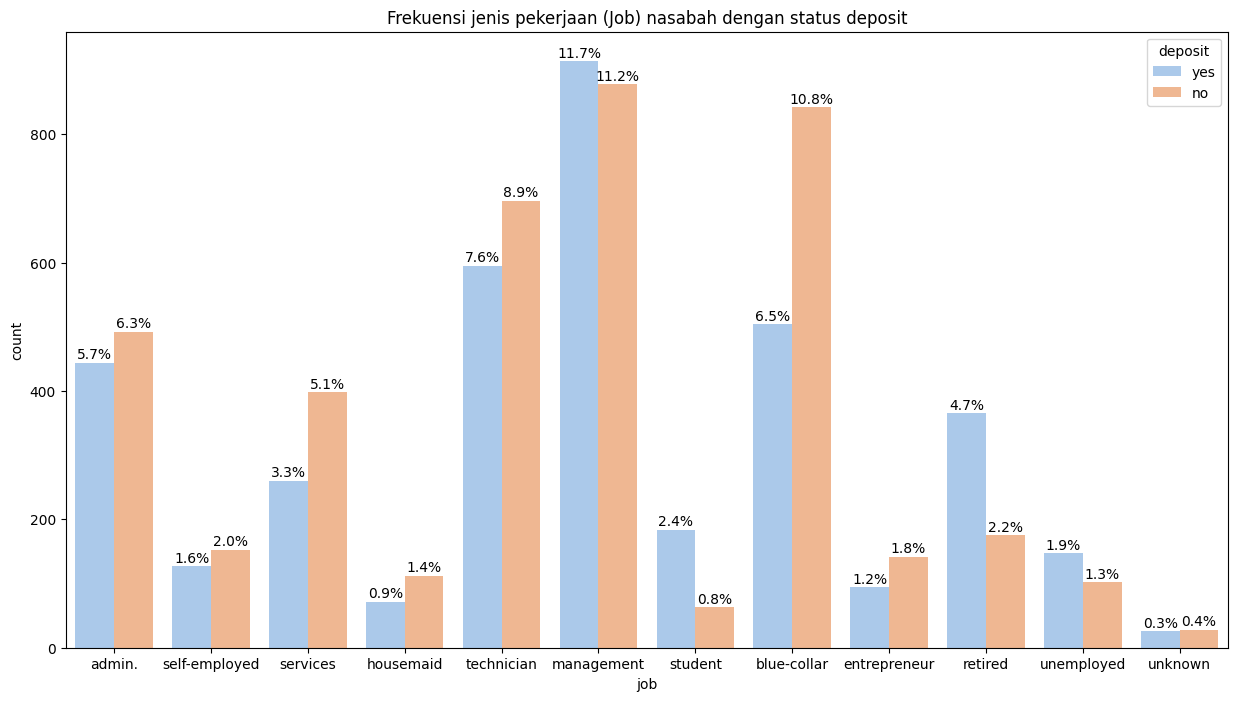

In [4]:
plt.subplots(figsize=(15, 8))
plt.title("Frekuensi jenis pekerjaan (Job) nasabah dengan status deposit")
ax = sns.countplot(data=data, x="job", hue='deposit', palette='pastel')
# ax.set_ylim([0, 450])

for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(data):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

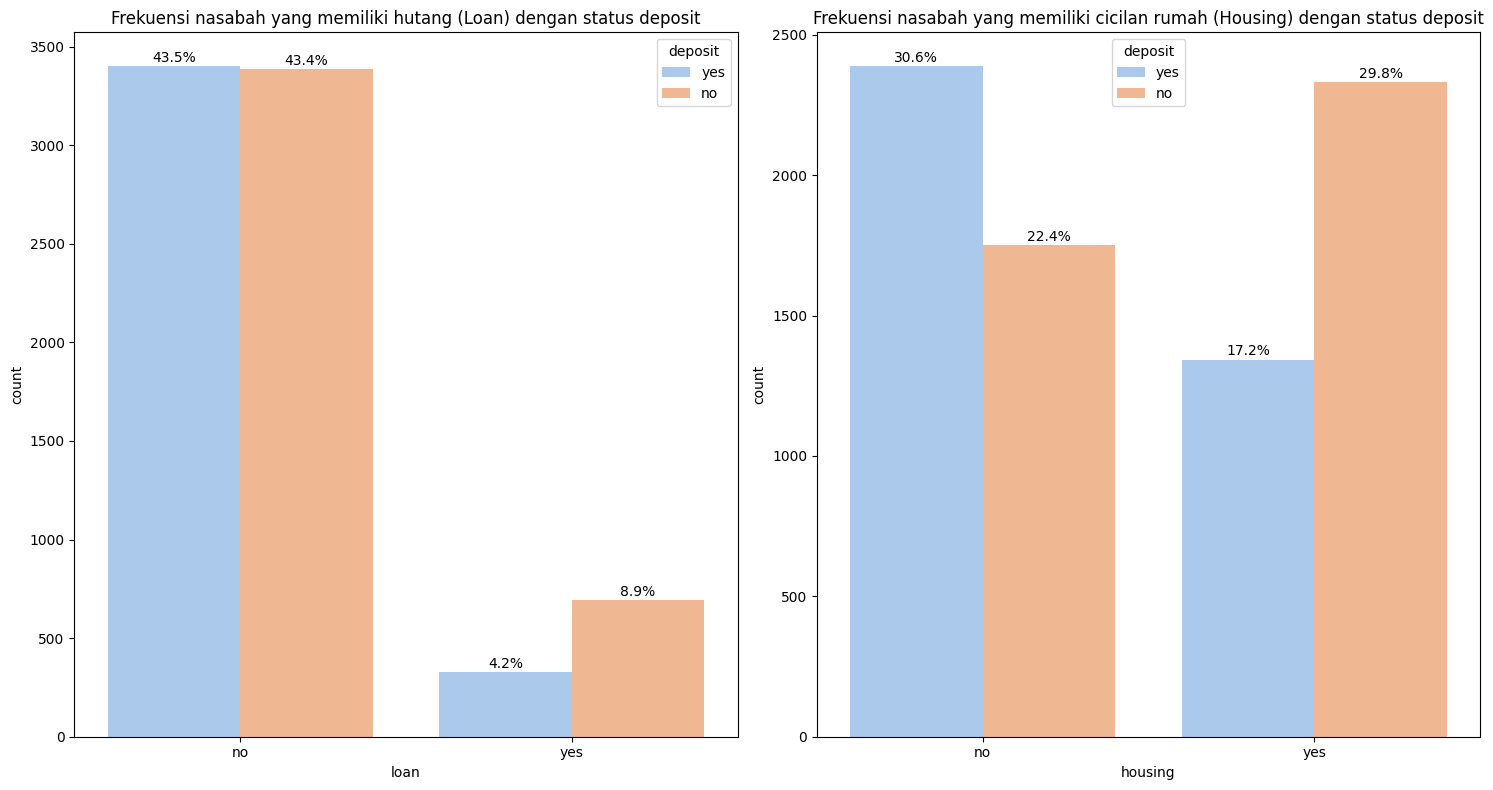

In [5]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Plot 1 - Frekuensi nasabah yang memiliki hutang (Loan) dengan status deposit
ax1 = axes[0]
ax1.set_title("Frekuensi nasabah yang memiliki hutang (Loan) dengan status deposit")
sns.countplot(data=data, x="loan", hue='deposit', palette='pastel', ax=ax1)

for p in ax1.patches:
    percentage = f'{100 * p.get_height() / len(data):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='center')

# Plot 2 - Frekuensi nasabah yang memiliki cicilan rumah (Housing) dengan status deposit
ax2 = axes[1]
ax2.set_title("Frekuensi nasabah yang memiliki cicilan rumah (Housing) dengan status deposit")
sns.countplot(data=data, x="housing", hue='deposit', palette='pastel', ax=ax2)

for p in ax2.patches:
    percentage = f'{100 * p.get_height() / len(data):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='center')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

__Insight :__<br>
1. Setiap kategori pekerjaan **(job)** memiliki pengaruh yang berbeda terhadap keputusan orang untuk membuka rekening deposito. Pengaruhnya bervariasi tergantung pada jenis pekerjaannya.

2. Bagi kategori kepemilikan rumah **(housing)**, orang yang memiliki KPR atau hutang rumah biasanya tidak membuka rekening deposito. Sementara itu, orang yang tidak memiliki KPR atau hutang rumah cenderung membuka rekening deposito.

3. Dalam kategori kepemilikan hutang perorangan **(loan)**, orang yang tidak memiliki hutang perorangan tetapi membuka rekening deposito jumlahnya hampir sama dengan orang yang tidak memiliki hutang perorangan dan tidak membuka rekening deposito. Namun, bagi orang yang memiliki hutang perorangan, kecenderungan mereka adalah tidak membuka rekening deposito.

#### **Initial Assesment**

In [6]:
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,type,null,negative,n_unique,sample_unique
0,age,int64,0.0,False,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0.0,False,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0.0,False,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0.0,False,2,"[no, yes]"
4,loan,object,0.0,False,2,"[no, yes]"
5,contact,object,0.0,False,3,"[cellular, telephone, unknown]"
6,month,object,0.0,False,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0.0,False,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0.0,False,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0.0,False,4,"[unknown, other, failure, success]"


__Insight :__
* Dataset terdiri dari 11 kolom dan 7813 baris
* Variabel numerik: age, balance, campaign, pdays
* Variabel categorical: job, housing, loan, contact, month, poutcome, deposit
* Pada kolom **job, contact, dan poutcome** terdapat value `unknown` dan perlu di handle
* Pada PDays values dengan nilai `-1` merupakan perubahan data dari 999 yang berarti client was not previously contacted (nasabah belum pernah dihubungi sebelumnya) pada dataset asli. ***[(sumber)](https://archive.ics.uci.edu/dataset/222/bank+marketing)*** yang perlu di handle

#### **Numerical variable**

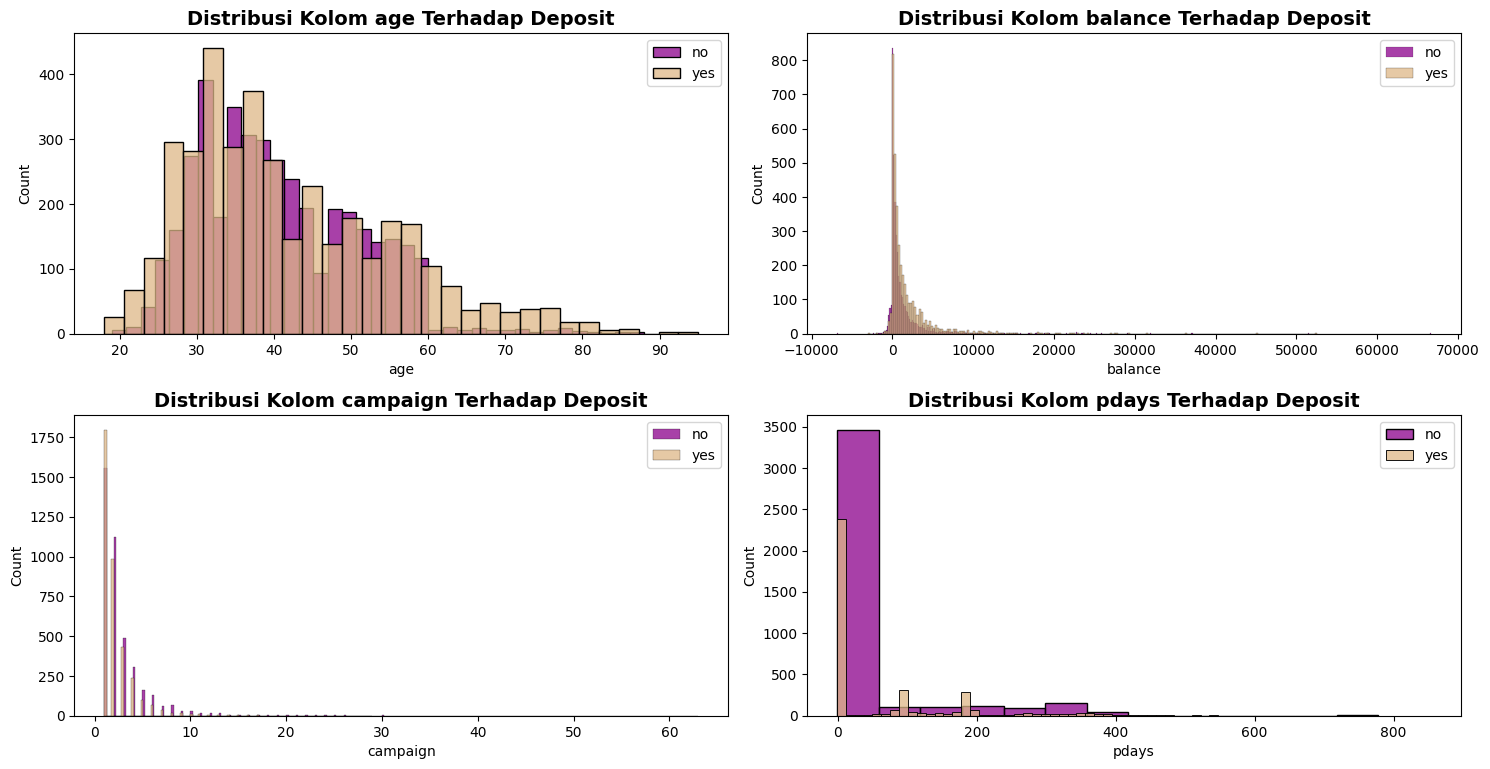

In [7]:
num_columns = ['age', 'balance', 'campaign', 'pdays']

plt.figure(figsize=(15, 15))
cmap = plt.get_cmap('summer')

a = 1
for i in num_columns:
    plt.subplot(4, 2, a)
    sns.histplot(x=data[data['deposit']=="no"][i], color="DarkMagenta")
    sns.histplot(x=data[data['deposit']=="yes"][i], color="BurlyWood")
    plt.legend(labels=['no', 'yes'])
    plt.tight_layout()
    plt.title(f'Distribusi Kolom {i} Terhadap Deposit', fontsize=14, weight='bold')
    a += 1


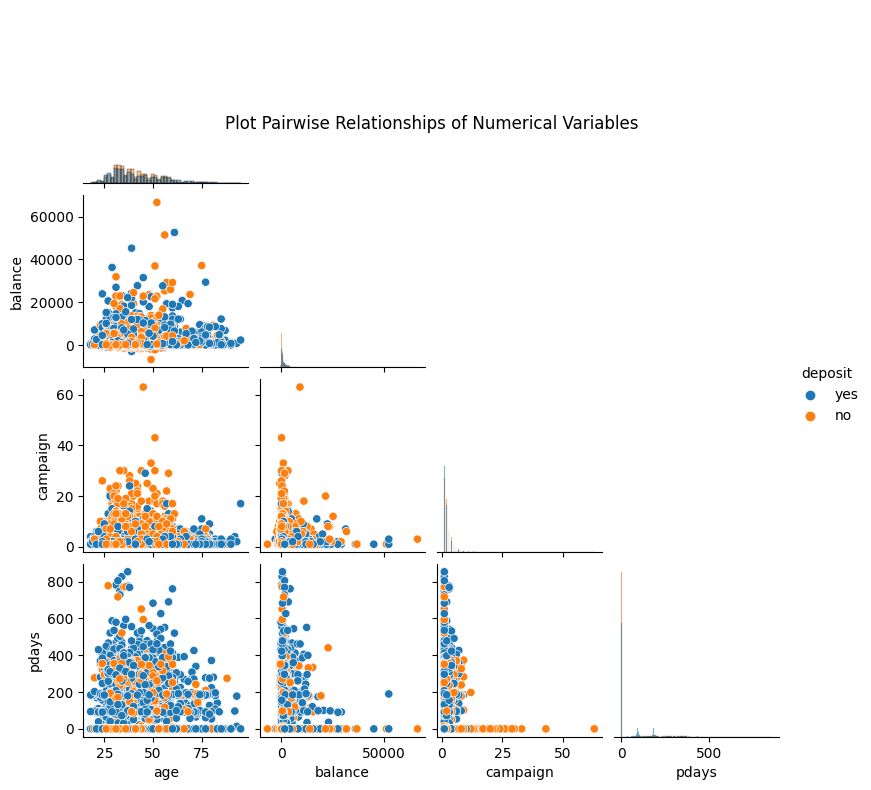

In [8]:
numerical = [var for var in data.columns if data[var].dtype != 'category']

graph = sns.pairplot(data[numerical], height=2.0, corner=True, diag_kind='hist', hue='deposit')
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=0.85)
plt.show()

ada outlier di tiga feature diatas pada label deafult/deposit maka dikatakan mutivariate

__Insight :__

* Distribusi data mayoritas variabel tidak mengikuti Gaussian
* Terdapat multivariate outlier khusunya pada data dengan label Default (Deposit)
* Mayoritas sebaran data cenderung tinggi
* Skala nilai pada variabel balance lebih luas (puluhan ribu)

#### **Categorical variable**

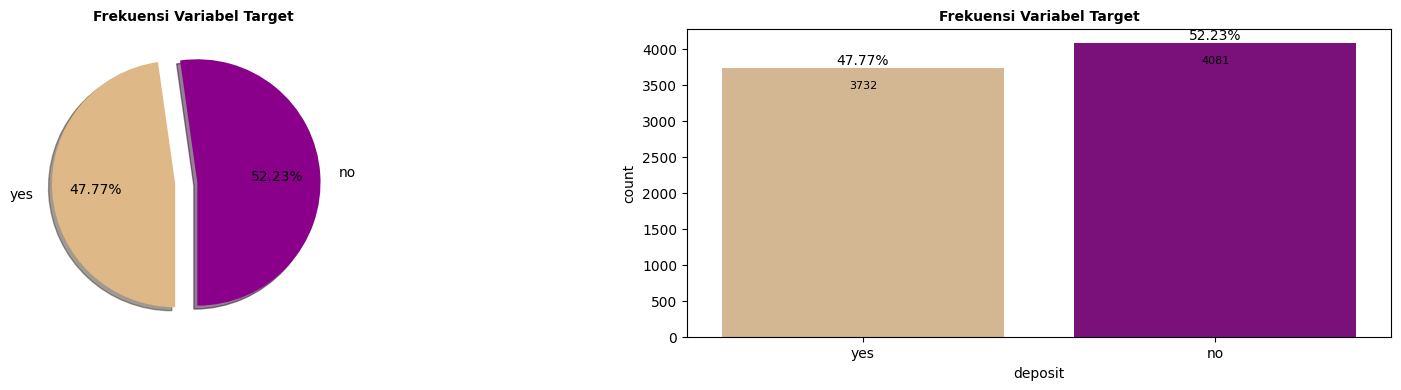

In [9]:
# Mengatur proporsi grafik
fig, axes = plt.subplots(1, 2, figsize=(20, 4))
plt.style.use('default')

# create pie chart
temp_data = data.deposit.value_counts(normalize=True) * 100
axes[0].pie(x=[temp_data.loc['no'], temp_data.loc['yes']], labels=['no', 'yes'], colors=["DarkMagenta", "BurlyWood"], autopct='%0.2f%%',
            startangle=270, pctdistance=0.65, labeldistance=1.15, explode=(0.03, 0.15), shadow=True)
# set title
axes[0].set_title('Frekuensi Variabel Target', fontsize=10, weight='bold')

# create barplot
plt.title("Frekuensi Variabel Target", fontsize=10, weight='bold')
ax = sns.countplot(data=data, x="deposit", palette=["BurlyWood", "DarkMagenta"], ax=axes[1])
# ax.set_ylim([0, 3700])
# annotation
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(data):.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                size=8,
                xytext=(0, -12),
                textcoords='offset points')

plt.show()

__Insight :__<br>
* Perbandingan data menunjukkan bahwa 52,2% nasabah tidak menaruh deposito, sedangkan 47,8% nasabah menaruh deposito.
* Jumlah nasabah yang tidak menaruh deposito sebanyak 4081, lebih banyak daripada nasabah yang menaruh deposito, yaitu 3732.
* Perbandingan ini termasuk dalam kategori target yang seimbang (balance), karena persentase nasabah yang membuka deposito dan yang tidak hampir sama.

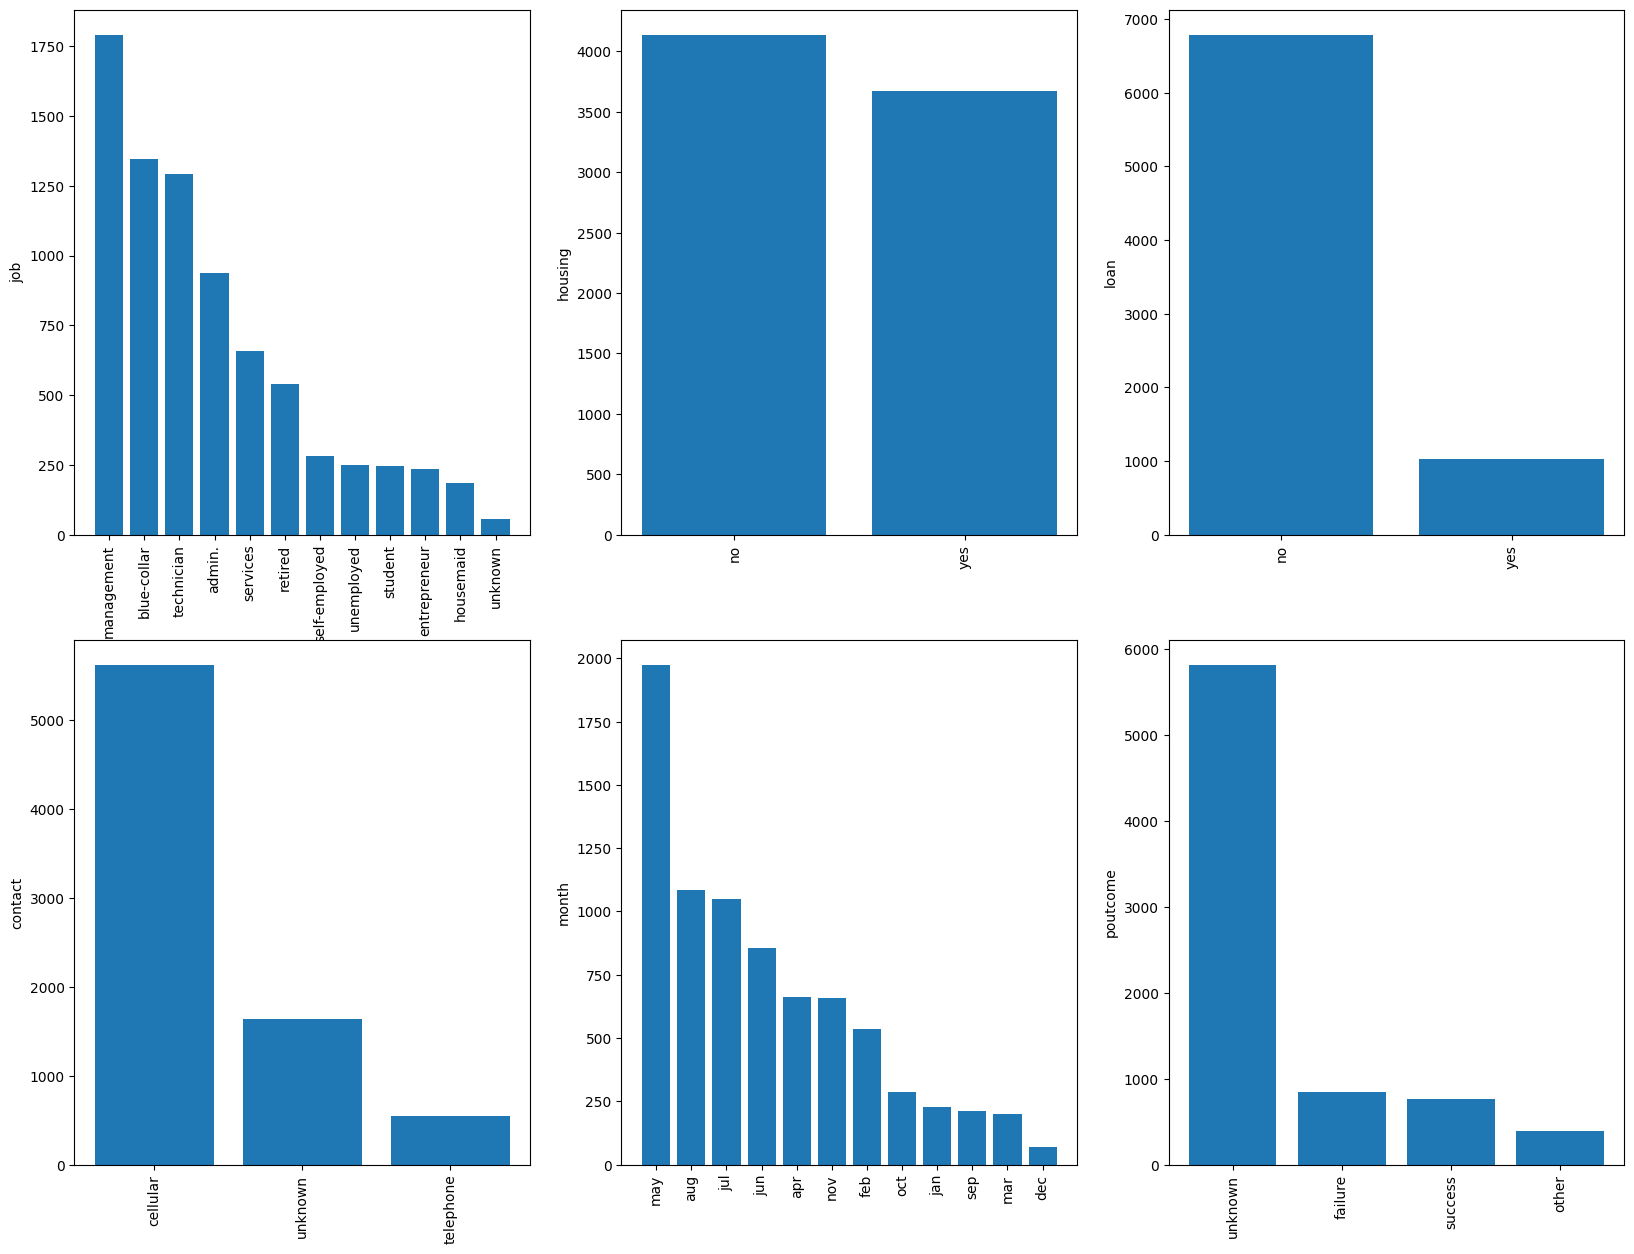

In [10]:
cat_columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_ylabel(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
    
plt.show()

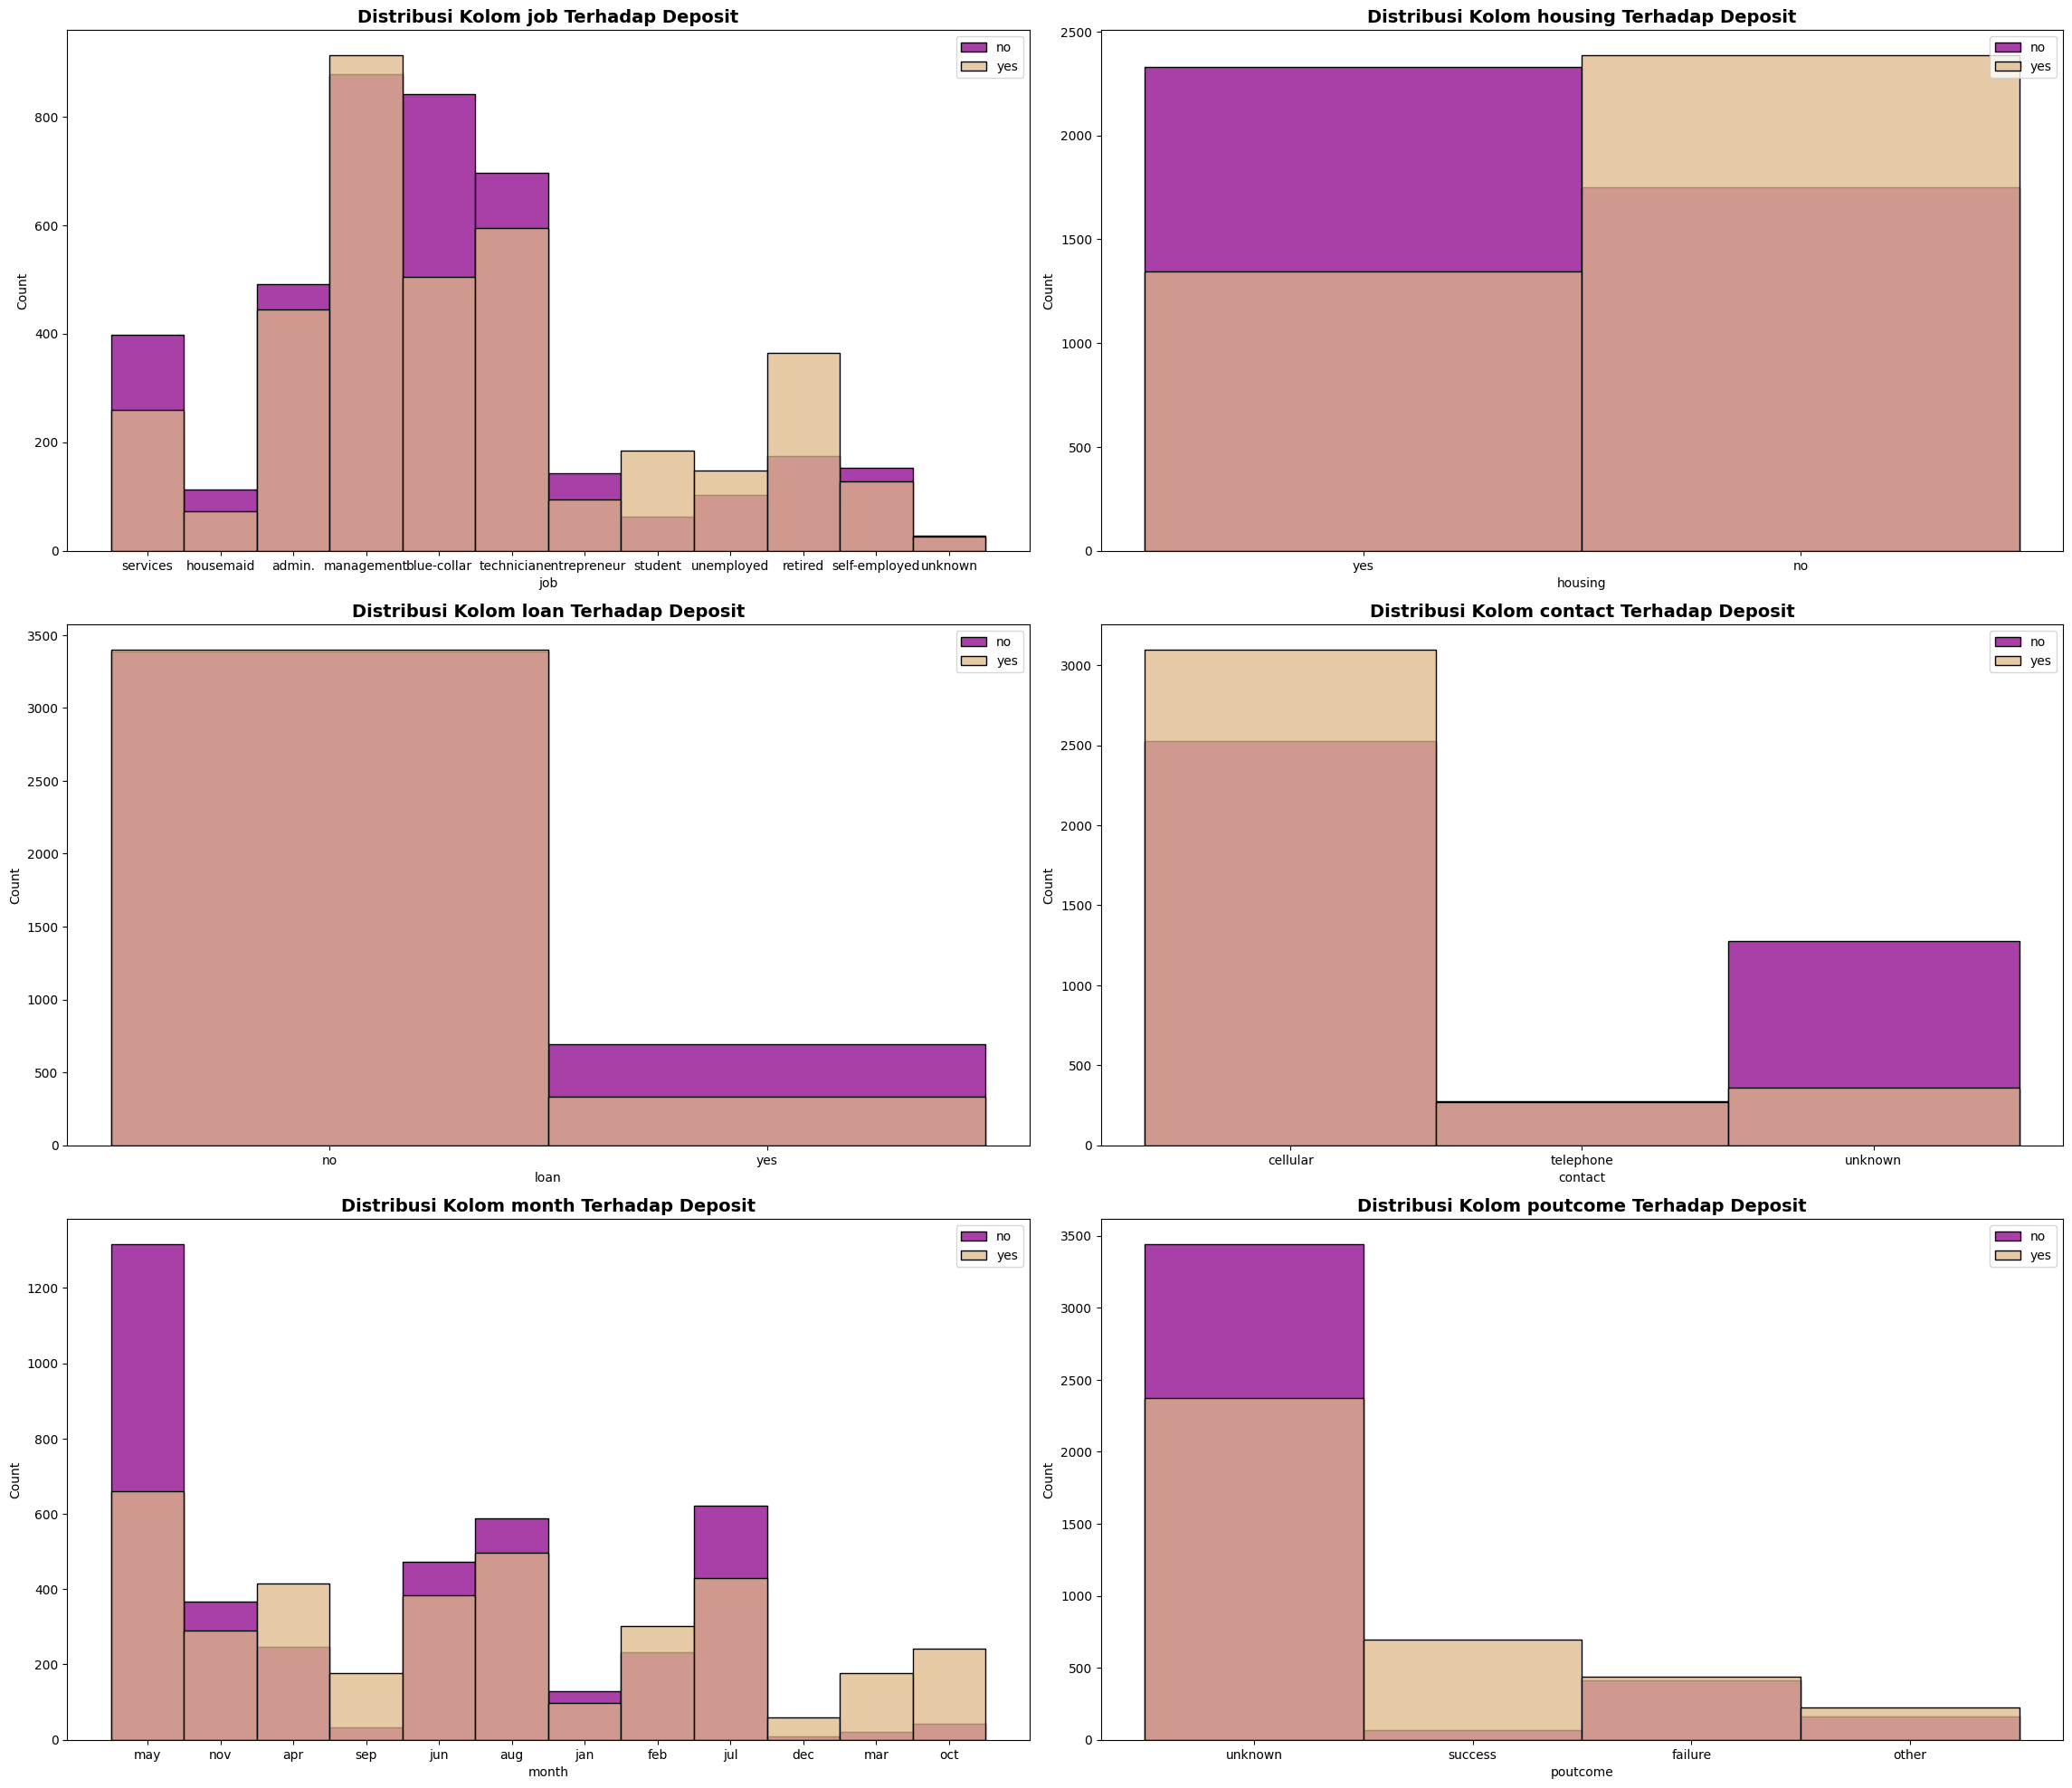

In [11]:
plt.figure(figsize=(23, 26))
cmap = plt.get_cmap('summer')

a = 1
for i in cat_columns:
    plt.subplot(4, 2, a)
    sns.histplot(x=data[data['deposit']=="no"][i], color="DarkMagenta")
    sns.histplot(x=data[data['deposit']=="yes"][i], color="BurlyWood")
    plt.legend(labels=['no', 'yes'])
    plt.tight_layout()
    plt.title(f'Distribusi Kolom {i} Terhadap Deposit', fontsize=14, weight='bold')
    a += 1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(data):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')

plt.show()

__Insight :__

* Terdapat 6 kolom kategorikal dalam dataset yang terbagi menjadi dua jenis, yaitu kolom yang memiliki urutan (**ordinal**) seperti `month`, dan kolom yang tidak memiliki urutan (**nominal**) seperti `job`, `housing`, `loan`, `contact`, `poutcome`, dan `deposit`.
* Dalam kolom `job`, `contact`, dan `poutcome`, terdapat nilai-nilai yang mendominasi. Nantinya, akan dilakukan pemeriksaan nilai-nilai langka (rare value) dan penanganan khusus jika diperlukan.
* Pada kolom `job`, pekerjaan sebagai `"management"` menjadi nilai yang mendominasi, menunjukkan bahwa orang-orang dengan pekerjaan tersebut memiliki tingkat ketertarikan yang tinggi untuk membuka rekening deposito.
* Pada kolom `contact`, penggunaan metode komunikasi `"celluler"` mendominasi, mmenunjukkan bahwa metode komunikasi dengan nasabah melalui ponsel (handphone) adalah yang paling efektif.

kalau bulan bisa binary atau ordinal encoding

### `Data Preparation`

In [12]:
df = data.copy()
df.sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
3882,53,management,2578,no,no,cellular,nov,4,107,failure,no
3340,59,management,68,yes,no,unknown,may,2,-1,unknown,no
3237,44,blue-collar,1397,no,no,cellular,nov,1,-1,unknown,no
1177,39,technician,1587,yes,no,cellular,jun,3,-1,unknown,yes
2258,49,blue-collar,0,no,yes,cellular,jul,1,-1,unknown,yes


In [13]:
display(
    # numerical variable
    df.describe(),
    # categorical variable
    df.describe(include='object')
)

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


#### **Data Wrangling**

In [14]:
# Membuat peta penggantian nilai 'no' dan ' yes
target_mapping = {
    'no': 0,
    'yes': 1
}

# Menggantikan nilai dalam kolom 'deposit' dengan menggunakan metode replace
df['deposit'] = df['deposit'].replace(target_mapping)

**Missing Value**, Deteksi dan kuantifikasi missing value:

(age         0
 job         0
 balance     0
 housing     0
 loan        0
 contact     0
 month       0
 campaign    0
 pdays       0
 poutcome    0
 deposit     0
 dtype: int64,
 <Axes: >)

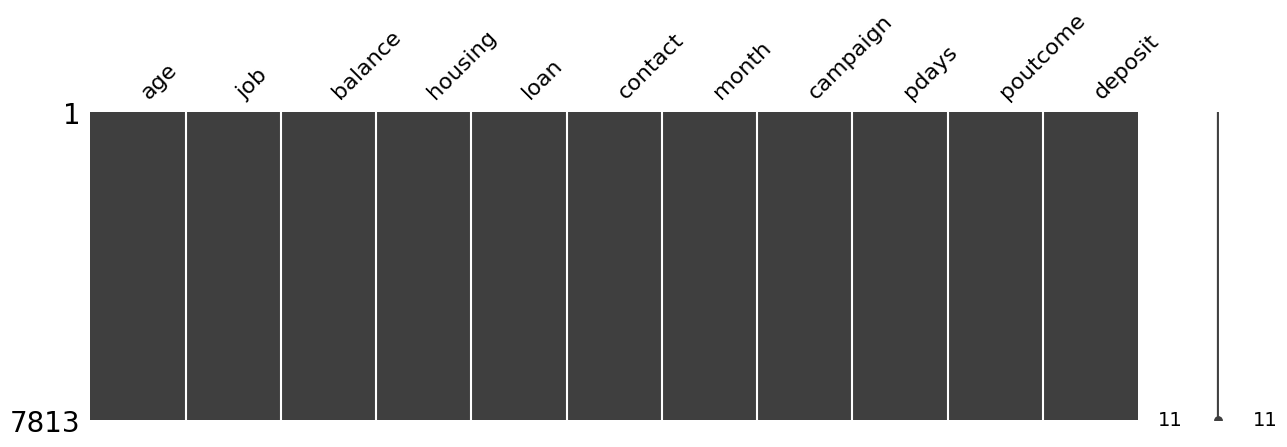

In [15]:
# Cek Missing Value seluruh kolom
df.isna().sum(), msno.matrix(data, figsize=(15, 4))

__Insight :__ 
* Tidak terdapat missing value pada setiap kolom dataset.

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data:

In [16]:
# Cek Data Duplikat

Duplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {Duplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah Data Duplikat: 8
Persentase Data Duplikat: 0.1%
Jumlah baris dan kolom: (7813, 11)


__Insight :__ 
* Sebesar 0.10% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplicate data

In [17]:
# Drop duplikat
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

# Tampilkan jumlah data duplikat dan persentase data duplikat
Duplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum() / df.shape[0]) * 100, 2)
print(f'Jumlah Data Duplikat: {Duplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')

# Tampilkan jumlah baris dan kolom setelah drop duplikat
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah Data Duplikat: 0
Persentase Data Duplikat: 0.0%
Jumlah baris dan kolom: (7805, 11)


**Data Typo**, Deteksi dan kuantifikasi text typo

In [18]:
# Cek data typo untuk categorical variable

CategoryVar = ["job", "contact", "month", "poutcome"]
for i in CategoryVar:
    uniqueValue = df[i].unique()
    print(f"Feature {i}: {uniqueValue}")

Feature job: ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown']
Feature contact: ['cellular' 'telephone' 'unknown']
Feature month: ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec']
Feature poutcome: ['unknown' 'other' 'failure' 'success']


__Insight :__
* pada kolom `job` terdapat jenis kategori yang typo yaitu **admin.**

Handling data typo:

In [19]:
rename_admin = {
    'admin.': 'admin'
}

# Menggantikan nilai dalam kolom 'job' dengan menggunakan metode replace
df['job'] = df['job'].replace(rename_admin)

**Outlier**, Deteksi dan kuantifikasi outlier

In [20]:
from pycaret.anomaly import *

anomaly = setup(session_id=0,
                data=df,
                outliers_threshold=0.05,
                normalize=True,
                normalize_method='zscore')

outlierIF = create_model('iforest', verbose=False)
df = assign_model(outlierIF)
plot_model(outlierIF, plot='umap')

total_outliers = len(df[df['Anomaly'] == 1])
total_data = len(df)
percent_outliers = (total_outliers / total_data) * 100

print(f"Jumlah total outliers ada: {total_outliers}")
print(f"Persentase outliers: {percent_outliers:.2f}%")

# Tampilkan jumlah nilai Anomaly
print(df.Anomaly.value_counts())

,Description,Value
0,Session id,0
1,Original data shape,"(7805, 11)"
2,Transformed data shape,"(7805, 38)"
3,Ordinal features,2
4,Numeric features,5
5,Categorical features,6
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


Jumlah total outliers ada: 391
Persentase outliers: 5.01%
0    7414
1     391
Name: Anomaly, dtype: int64


__Insight :__<br>
* Jumlah total outliers ada 391. Hal ini menunjukkan adanya data yang diidentifikasi sebagai anomali atau outlier dalam dataset.
* Persentase outliers adalah 5.01%. Ini berarti sekitar 5.01% dari keseluruhan data dalam dataset dianggap sebagai outliers atau data yang jarang dan akan dihandling menggunakna pycaret.
* Dari data tersebut, sebanyak 7414 data (nilai 0) dianggap sebagai data normal atau mayoritas, sedangkan 391 data (nilai 1) dianggap sebagai outliers.

Handling outlier:

In [21]:
# df = df[df['Anomaly']== 0]
# df = df.drop(columns=['Anomaly', 'Anomaly_Score'])
# print(f"Jumlah total data terbaru: {len(df)}")

**Rare label**, Deteksi dan kuantifikasi rare value:

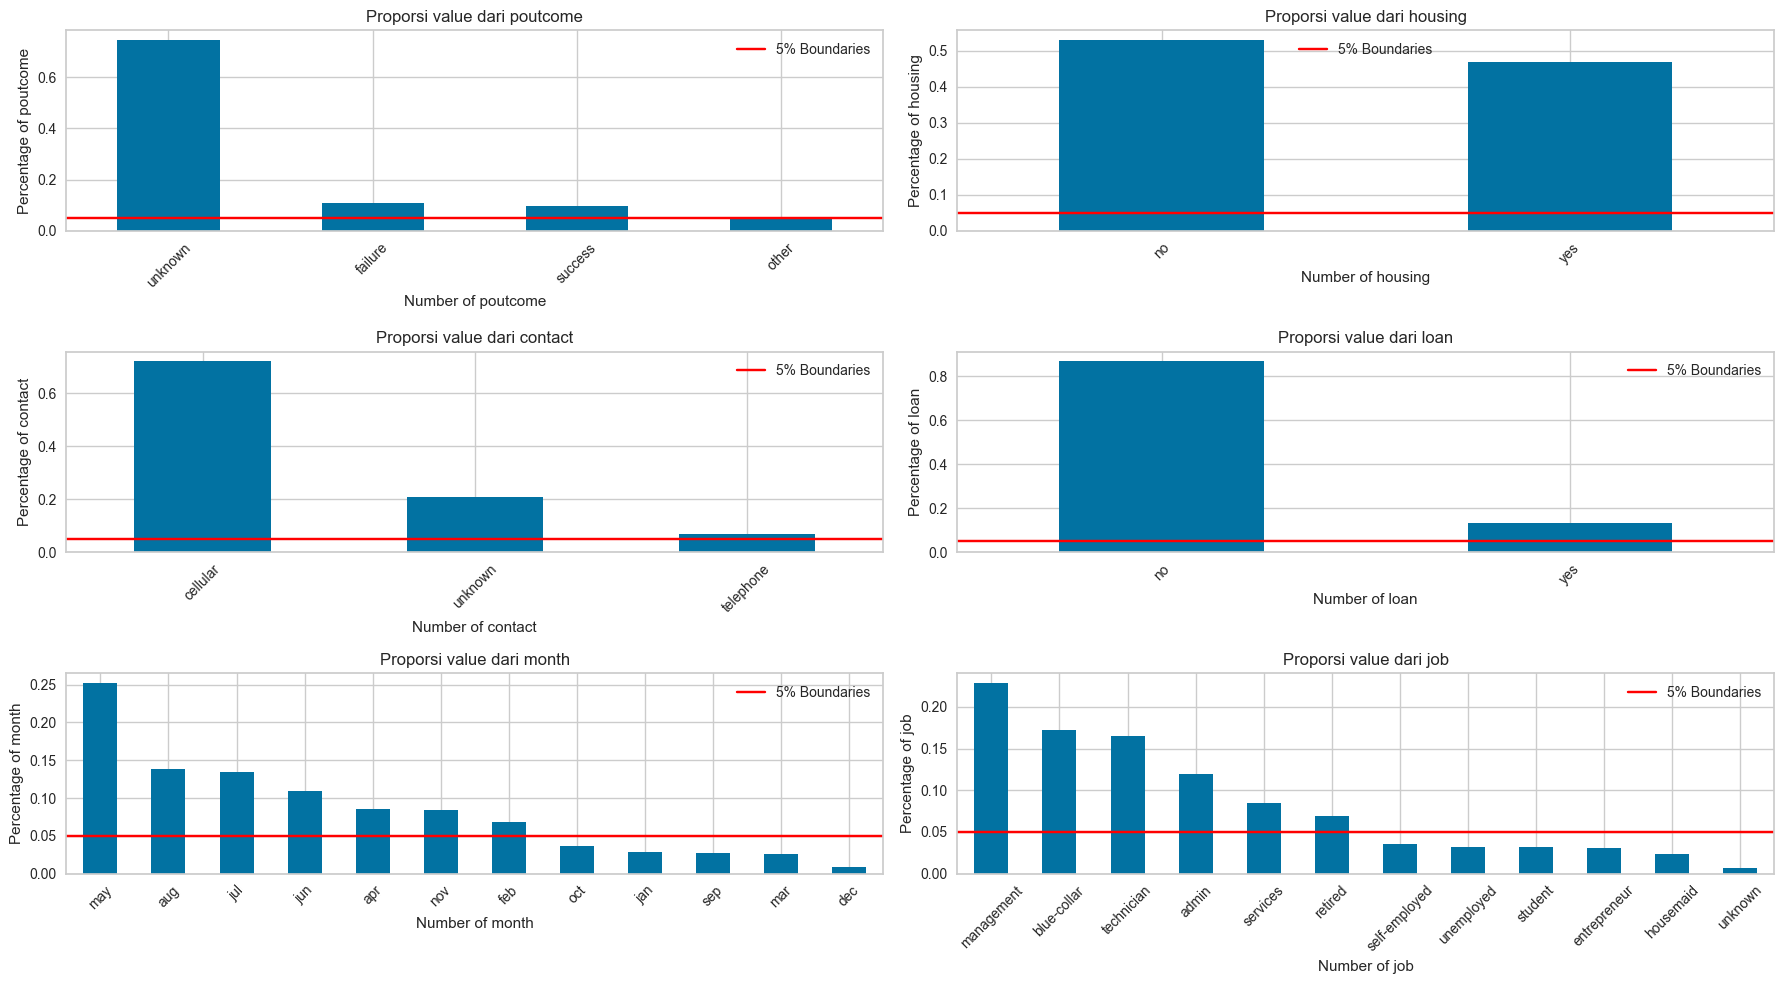

In [22]:
# kolom 'job', 'housing', 'loan', 'contact', 'month', 'poutcome'
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))

# Data columns
columns = ['poutcome', 'housing', 'contact', 'loan', 'month', 'job']

# Title for each subplot
titles = ['Proporsi value dari poutcome', 'Proporsi value dari housing', 
          'Proporsi value dari contact', 'Proporsi value dari loan', 
          'Proporsi value dari month', 'Proporsi value dari job']

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
    # DataFrame
    temp_df = pd.Series(df[columns[i]].value_counts() / len(df)).sort_values(ascending=False).plot(kind='bar', label='', ax=ax)
    
    # Set title
    ax.set_title(titles[i])
    
    # Horizontal line: boundary yang digunakan adalah 5%, di bawah 5% akan diasumsikan sebagai rare value
    ax.axhline(y=0.05, color='red', label='5% Boundaries')
    
    # Set x label and its rotation
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel(f"Number of {columns[i]}")
    
    # Y label
    ax.set_ylabel(f'Percentage of {columns[i]}')
    
    # Legend
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show graph
plt.show()

Handling rare label:
<br>
*  Merubah fitur/kolom **month** menggunakan Ordinal Encoding, karena fitur ini memiliki urutan
* Penggabungan kategori **unknown** kedalam **other** pada kolom **poutcome** karena informasinya tidak diketahui.
* Penggabungan kategori **student**, **retired**, dan **unknown** dengan **unemployed** dilakukan berdasarkan asumsi bahwa baik siswa maupun orang yang telah pensiun tidak memiliki pekerjaan pada saat tertentu. Selain itu, kategori **unknown** juga diasumsikan tidak memiliki pekerjaan karena informasinya tidak diketahui.
* Pada kategori **housmaid** akan digabungkan dengan **services**. Karena dapat dikatakan bahwa **housmaid** merupakan salah astu jenis pekerjaan **service**. ***[sumber](https://rstudio-pubs-static.s3.amazonaws.com/717459_5136236cf5064b8d973e4d8c1b863943.html)***

In [23]:
Columns = []
Unknown = []
percentUnknown = []

for i in cat_columns:
    unknown = df[i].str.contains('unknown').sum()
    Unknown.append(unknown)

    percent_unknown = (unknown / len(df) * 100).round(2)
    percentUnknown.append(percent_unknown)

    Columns.append(i)

pd.DataFrame({
    'Columns' : Columns,
    'Number of unknown' : Unknown,
    '% unknown' : percentUnknown
}
)

,Columns,Number of unknown,% unknown
0,job,54,0.69
1,housing,0,0.00
2,loan,0,0.00
3,contact,1636,20.96
4,month,0,0.00
5,poutcome,5811,74.45


__Insigth :__
*  Merubah fitur/kolom **month** menggunakan Ordinal Encoding, karena fitur ini memiliki urutan
* Penggabungan kategori `student`, `retired`, dan `unknown` dengan `unemployed` dilakukan berdasarkan asumsi bahwa baik siswa maupun orang yang telah pensiun tidak memiliki pekerjaan pada saat tertentu. Selain itu, kategori `unknown` juga diasumsikan tidak memiliki pekerjaan karena informasinya tidak diketahui.
* Penggabungan kategori `unknown` dengan `other` pada kolom **poutcome** karena informasinya tidak diketahui.
* Pada kategori `housmaid` akan digabungkan dengan `services`. Karena dapat dikatakan bahwa `housemaid` merupakan salah astu jenis pekerjaan `service`. ***[sumber](https://rstudio-pubs-static.s3.amazonaws.com/717459_5136236cf5064b8d973e4d8c1b863943.html)***
* Semua fitur/kolom akan dihandling menggunakan pycaret.

#### **Feature Engineering**

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

df_train.shape, df_test.shape

((6244, 13), (1561, 13))

Deklarasi class untuk kategorisasi ulang variabel **job**, **month**, **poutcome**, **balance**:

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class clearAll(BaseEstimator, TransformerMixin):
    
    def _init_(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Replace value entrepreneur, student, retired, unknown, dan housemaid pada column job
        X['job'].replace({"student": "unemployed",
                          "retired": "unemployed",   
                          "unknown" : "unemployed",
                          "housemaid": "services"},
                          inplace= True)


        # Replace value month
        X['month'].replace({"jan": 1,
                            "feb": 2,
                            "mar": 3,
                            "apr": 4,
                            "may": 5,
                            "jun": 6,
                            "jul": 7,
                            "aug": 8,
                            "sep": 9,
                            "oct": 10,
                            "nov": 11,
                            "dec": 12},inplace= True)

        # Replace value unknown menjadi other pada column poutcome
        X['poutcome'].replace("unknown", "other", inplace= True)

        # Transformasi kolom 'age' dan 'balance' menggunakan pd.cut()
        age_bins = [-float('inf'), 25, 35, 60, float('inf')]
        age_labels = ['young', 'early-middle', 'late-middle', 'old']
        # X['age'] = pd.cut(X['age'], bins=age_bins, labels=age_labels)
        
        balance_bins = [-float('inf'), 0, 500, 1500, float('inf')]
        balance_labels = ['very-low', 'low', 'medium', 'high']
        X['balance'] = pd.cut(X['balance'], bins=balance_bins, labels=balance_labels)
        return X.to_numpy()

In [26]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
import category_encoders as ce
from pycaret.internal.preprocess.transformers import TransformerWrapper, RemoveOutliers

# Membuat pipeline transformasi
pipeline = [
    ("clearAll", TransformerWrapper(include=['job', 'month', 'poutcome', 'pdays', 'balance'], transformer=clearAll())),
    ('scaleler', TransformerWrapper(include=['pdays'], transformer=MinMaxScaler((0,1)))),
    ('onehot', TransformerWrapper(include=['poutcome', 'contact', 'housing', 'loan'], transformer=OneHotEncoder())),
    ('binary', TransformerWrapper(include=['job'], transformer=ce.BinaryEncoder())),
    ('ordinal', TransformerWrapper(include=['month','balance'], transformer=OrdinalEncoder())),
    ("remove_outlier", TransformerWrapper(transformer=RemoveOutliers(method='iforest', random_state=42, threshold=0.05)))
    ]

Setting parameter dasar untuk menginisialisasi experiment dan membuat pipeline transformasi:

In [27]:
# Setting parameter dasar menggunakan pycaret
# import pycaret
from pycaret.classification import *

clf = setup(
    # general setup
    data=df_train, 
    target='deposit',
    train_size=0.8,
    verbose=True,
    preprocess=False,  
    
    # feature setup
    numeric_features= ['age', 'balance', 'month', 'campaign', 'pdays'],
    categorical_features = ['job','contact', 'poutcome', 'housing', 'loan'],

    # experiment setup
    session_id=42,
    log_experiment=True, 
    log_data=True,
    log_plots=True,

    # data wrangling
    # ignore_features=['default'],
    # remove_outliers=True,
    # outliers_method='lof',
    # outliers_threshold=0.1,
    custom_pipeline=pipeline,
    custom_pipeline_position=0,
)

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(6244, 13)"
4,Transformed data shape,"(5994, 22)"
5,Transformed train set shape,"(4745, 22)"
6,Transformed test set shape,"(1249, 22)"
7,Numeric features,5
8,Categorical features,5


Proses encoding:

In [28]:
pd.set_option('display.max_columns', 500)

In [29]:
get_config('dataset_transformed')

,age,job_0,job_1,job_2,job_3,balance,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month,campaign,pdays,poutcome_failure,poutcome_other,poutcome_success,Anomaly,Anomaly_Score,deposit
4575,51,0,0,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,2,0.000000,0.0,1.0,0.0,0,-0.059321,0
6638,23,0,0,1,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,2,0.000000,0.0,1.0,0.0,0,-0.058711,1
815,26,0,0,1,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,8,0.000000,0.0,1.0,0.0,0,-0.080634,0
5638,30,0,1,0,0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2,0.000000,0.0,1.0,0.0,0,-0.083194,0
950,30,0,1,0,1,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,8,0.000000,0.0,1.0,0.0,0,-0.080407,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,36,0,1,0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2,0.227047,1.0,0.0,0.0,0,-0.038565,1
5292,31,0,0,1,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,4,0.000000,0.0,1.0,0.0,0,-0.062873,1
6302,61,0,0,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,10.0,1,0.000000,0.0,1.0,0.0,0,-0.069570,1
4981,25,0,1,0,0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,2,0.000000,0.0,1.0,0.0,0,-0.093888,0


In [30]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\NOR\AppData\Local\Temp\joblib),
         steps=[('clearAll',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['job',
                                                                            'month',
                                                                            'poutcome',
                                                                            'pdays',
                                                                            'balance'],
                                                                   transformer=clearAll()))),
                ('scaleler',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper...
                                                                   transformer=OrdinalEncoder(categories='auto',
                                                                                              dtype=<class 'numpy.float64'>,
                                                                                              encoded_missing_value=nan,
                                                                                              handle_unknown='error',
                                                                                              unknown_value=None)))),
                ('remove_outlier',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=RemoveOutliers(method='iforest',
                                                                                              n_jobs=1,
                                                                                              random_state=42,
                                                                                              threshold=0.05))))],
         verbose=False)

### `Modeling`

**Model Experiment**

In [31]:
from sklearn.metrics import balanced_accuracy_score

add_metric('bacc', 'Bal. Accuracy', balanced_accuracy_score, greater_is_better=True, target='pred')
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x0000020550F99280>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x0000020550F99...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x0000020550F99...,make_scorer(matthews_corrcoef),pred,{},True,True,False
bacc,Bal. Accuracy,Bal. Accuracy,<function balanced_accuracy_score at 0x0000020...,make_scorer(balanced_accuracy_score),pred,{},True,True,True


Next, mencari benchmark model menggunakan komparasi hasil validasi silang. Dengan benchmark model, akan lebih mudah memperkirakan apakah tujuan proyek ini dapat dicapai, berapa banyak waktu yang dibutuhkan untuk menyelesaikan proyek, dan kualitas dari pipeline transformasi.

Bandingkan model regresi atau klasifikasi untuk mendapatkan benchmark model:

In [32]:
compare_models(include=['lr', 'gbc', 'ada', 'lightgbm', 'ridge', 'dt', 'rf', 'knn'], sort= 'F1' )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:43:48
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Bal. Accuracy,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7251,0.8106,0.6769,0.7320,0.7028,0.4479,0.4497,0.7233,7.2120
rf,Random Forest Classifier,0.7193,0.8033,0.6857,0.7182,0.7013,0.4368,0.4375,0.7180,11.0810
gbc,Gradient Boosting Classifier,0.7105,0.7931,0.6274,0.7322,0.6754,0.4170,0.4213,0.7074,5.9850
ada,Ada Boost Classifier,0.7093,0.7751,0.6182,0.7351,0.6714,0.4142,0.4194,0.7059,6.0180
ridge,Ridge Classifier,0.6875,0.0000,0.6336,0.6909,0.6607,0.3721,0.3736,0.6855,5.9300
lr,Logistic Regression,0.6823,0.7456,0.6378,0.6810,0.6585,0.3621,0.3630,0.6806,6.6750
dt,Decision Tree Classifier,0.6613,0.6605,0.6403,0.6502,0.6449,0.3211,0.3215,0.6605,6.9620
knn,K Neighbors Classifier,0.6593,0.6980,0.5923,0.6627,0.6254,0.3147,0.3165,0.6567,6.1660


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

__Insigth :__
* Tabel di atas menunjukkan komparasi antara rerata skor matrik evaluasi terhadap 8 model klasifikasi berbeda.
* Dengan nilai rata-rata F1-Score di bawah 0.5, model ini menunjukkan skor presisi lebih besar dari skor recall, artinya hasil prediksi FN lebih banyak dibandingkan FP.
* Dengan mempertimbangkan nilai metric, training time (TT), dan kemampuan interpretasi, maka model yang diunggulkan pada dataset ini adalah *`Light Gradient Boosting Machine`*, *`Gradient Boosting Classifier`* dan *`Random Forest Classifier`*.
* Selanjutnya, 3 model tersebut akan di tunning dan dievaluasi ulang performanya untuk dipilih sebagai benchmark model.

Lakukan optimasi model benchmark:

__*Light Gradient Boosting Machine*__

In [33]:
lightgbm = create_model('lightgbm', cross_validation=True, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:56:15
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Hasil dari crossvalidati pada nilai **`F1-Score`** menunjukkan pada percobaan data *train* sebesar 0.8461 dan pada percobaan data *tes* 0.7028, hal ini dirasa masih overfitting maka dilakukan percobaan optimalisasi dengan mempertimbangkan probability threshold.

In [34]:
evallgbm = evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Mencoba optimalisasi model dengan mempertimbangkan probability threshold

In [35]:
lightgbm = create_model('lightgbm', cross_validation=True, return_train_score=True, probability_threshold = 0.35)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:02:04
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Setelah mempertimbangkan probability threshold **`F1-Score`** menunjukkan pada percobaan data *train* sebesar 0.8461 menjadi 0.8417 dan pada percobaan data *tes* 0.7028 menjadi 0.7292, hal ini juga masih dirasa cukup overfitting sehingga akan dilalukan tunning hyperparameter.

In [36]:
param_grid = {
    'num_leaves': [20, 30, 31],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1, 2],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [ 0.1, 1, 10, 100, 1000],
    'reg_lambda': [0.1, 1, 10, 100, 1000],
}

tuned_lgbm = tune_model(
    estimator=lightgbm, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:06:18
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


__Insight :__
* Setelah melakukan tunning hypermeter, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami penurunan dari 0.8417 menjadi 0.7871, sementara pada data *tes* juga mengalami penurunan dari 0.7292 menjadi 0.7237. 

__*Gradient Boosting Classifier*__

In [49]:
gbc = create_model('gbc', cross_validation=True, return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Hasil dari crossvalidasi yang dilakukan pada nilai **`F1-Score`** menunjukkan pada percobaan data *train* adalah sebesar 0.7155 dan pada percobaan data *tes* adalah sebesar 0.6754, hal ini dirasa masih overfitting maka dilakukan percobaan optimalisasi dengan mempertimbangkan probability threshold.

In [50]:
evalada = evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Mencoba optimalisasi model dengan mempertimbangkan probability threshold

In [55]:
gbc = create_model('gbc', cross_validation=True, return_train_score=True, probability_threshold = 0.39)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:32:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Setelah melakukan percobaan dengan mempertimbangkan probability threshold, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami kenaikan dari 0.7155 menjadi 0.7483, sementara pada data *tes* juga mengalami kenaikan dari 0.6754 menjadi 0.7079. 

Percobaan dengan tuning hyperparameters

In [56]:
param_grid = {
    'max_depth': [ 1, 5],
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1, 2],
    'n_estimators': [50, 100, 200],
    'max_features' : [10, 15, 20, 25, 28]
}


tuned_gbc = tune_model(
    estimator=gbc, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:40:31
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


__Insight__:
* Setelah melakukan percobaan dengan tunning hypermeter, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami kenaikan dari 0.7483 menjadi 0.8182, sementara pada data *tes* juga mengalami kenaikan dari 0.7079 menjadi 0.7181

__*Random Forest*__

In [57]:
rf = create_model('rf', cross_validation=True, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:57:20
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Hasil dari crossvalidasi yang dilakukan pada nilai **`F1-Score`** menunjukkan pada percobaan data *train* adalah sebesar 0.9853 dan pada percobaan data *tes* adalah sebesar 0.7182, hal ini dirasa masih overfitting maka dilakukan percobaan optimalisasi dengan mempertimbangkan probability threshold.

In [58]:
evalrf = evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Mencoba optimasi model dengan setting probability threshold

In [59]:
rf = create_model('rf', cross_validation=True, return_train_score=True, probability_threshold = 0.35)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Setelah melakukan percobaan dengan mempertimbangkan probability threshold, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami penurunan dari 0.9853 menjadi 0.9739,  sementara pada data *tes* juga mengalami kenaikan dari 0.7182 menjadi 0.7306

Percobaan dengan tuning hyperparameters

In [60]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [50, 100, 150],
    'min_samples_leaf': [20, 40, 60, 80, 100],
    'max_features': [10, 15, 20, 25, 28]
}

tuned_rf = tune_model(
    estimator=rf, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:03:46
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


__Insight__:
* Setelah dilakukan tunning hyperparameters terjadi penurunan nilai `f1-score` pada data train yang tadinya **0.9994** menjadi **0.8582** dan juga penurunan pada nilai data test yang sebelumnya **0.8426** menjadi **0.8369**

Validasi silang 10-fold untuk mendapatkan rentang kinerja model:

In [61]:
compare_models(include=[tuned_lgbm, tuned_gbc, tuned_rf])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:23:39
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CustomProbabilityThresholdClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Bal. Accuracy,TT (Sec)
0,Light Gradient Boosting Machine,0.7011,0.8106,0.8374,0.6462,0.7292,0.4080,0.4256,0.7063,5.0160
1,Gradient Boosting Classifier,0.6967,0.7986,0.8041,0.6491,0.7181,0.3980,0.4091,0.7008,4.9190
2,Random Forest Classifier,0.6957,0.8033,0.8587,0.6360,0.7306,0.3985,0.4229,0.7019,4.8830


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(boosting_type='gbdt', class_weight=None,
                                     classifier=LGBMClassifier(boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                                                               min_child_weight=0.001,
                                                               min_split_gain=0.0,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_leaves=31,
                                                               objective=None,
                                                               random_state=4...
                                                               subsample_for_bin=200000,
                                                               subsample_freq=0),
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, probability_threshold=0.35,
                                     random_state=42, reg_alpha=0.0,
                                     reg_lambda=0.0, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0)

In [62]:
finalizeModels = finalize_model(tuned_lgbm)

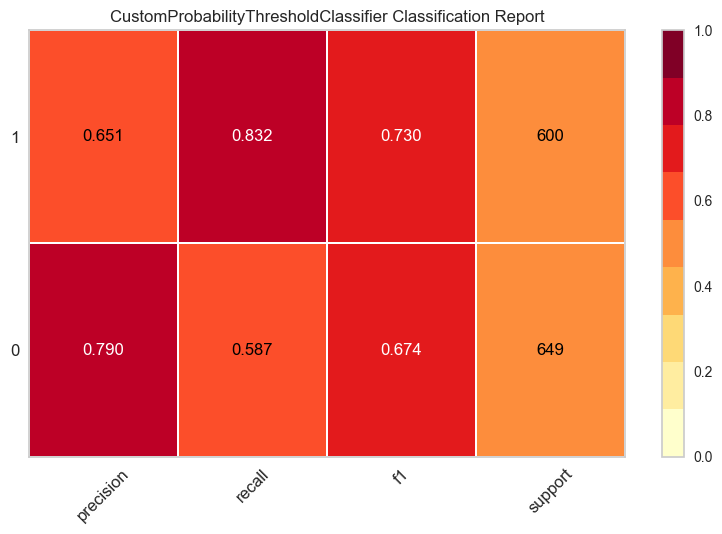

In [63]:
plot_model(tuned_lgbm, plot= 'class_report')

**Model Intepretation**

* .....
* .....
* .....

**Model Limitation**

* .....
* .....
* .....


### `Conclusion`

Beberapa hal yang dapat disimpulkan yaitu:

* ....
* ....
* ....

### `Recommendations`

Hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

* ....
* ....
* ....